In [56]:
! pip install -U textblob
! pip install wordcloud

Requirement already up-to-date: textblob in /anaconda3/lib/python3.6/site-packages (0.15.3)
Requirement not upgraded as not directly required: nltk>=3.1 in /anaconda3/lib/python3.6/site-packages (from textblob) (3.3)
Requirement not upgraded as not directly required: six in /anaconda3/lib/python3.6/site-packages (from nltk>=3.1->textblob) (1.11.0)
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 163kB 2.3MB/s ta 0:00:01
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd            
from textblob import TextBlob 
from itertools import islice
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/neep/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/neep/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/neep/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/neep/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/neep/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/neep/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!

True

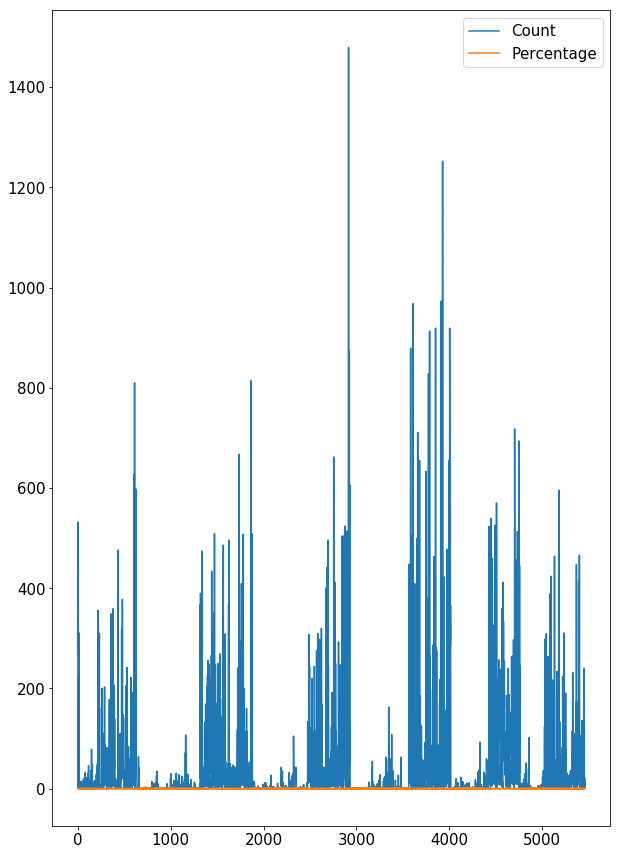

In [62]:
df_survey_data = pd.read_csv("Whatsgoodly - Thought Catalog Influencers.csv")
df_survey_data.head()
df_survey_data.plot()

In [3]:
COLS = ['date','text', 'sentiment','subjectivity','polarity']
df = pd.DataFrame(columns=COLS)

In [4]:
for index, row in islice(df_survey_data.iterrows(), 0, None):
     new_entry = []
     text_lower= row['Answer'].lower()
     blob = TextBlob(text_lower)
     sentiment = blob.sentiment
     polarity = sentiment.polarity
     subjectivity = sentiment.subjectivity
     new_entry += [row['Segment Type'],text_lower,sentiment,subjectivity,polarity]    
     single_survey_sentimet_df = pd.DataFrame([new_entry], columns=COLS)
     df = df.append(single_survey_sentimet_df, ignore_index=True)
df.to_csv('Text_Sentiment_Values.csv', mode='w', columns=COLS, index=False, encoding="utf-8")

In [5]:
df.head()

,date,text,sentiment,subjectivity,polarity
0,Mobile,is this product cool?,"(0.35, 0.65)",0.650,0.350
1,Mobile,this is lame,"(-0.5, 0.75)",0.750,-0.500
2,Mobile,get that money!,"(0.0, 0.0)",0.000,0.000
3,Mobile,other (comment),"(-0.125, 0.375)",0.375,-0.125
4,Web,is this product cool?,"(0.35, 0.65)",0.650,0.350


In [6]:
df.describe()

,subjectivity,polarity
count,5460.000000,5460.000000
mean,0.256217,0.100278
std,0.374408,0.220848
min,0.000000,-0.500000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.525000,0.250000
max,1.000000,0.600000


In [7]:
dffilter = df.loc[(df.loc[:, df.dtypes != object] != 0).any(1)]
dffilter.describe()

,subjectivity,polarity
count,2480.000000,2480.000000
mean,0.564091,0.220774
std,0.367361,0.284239
min,0.066667,-0.500000
25%,0.100000,0.016667
50%,0.525000,0.260000
75%,1.000000,0.500000
max,1.000000,0.600000


Text(0,0.5,'Range')

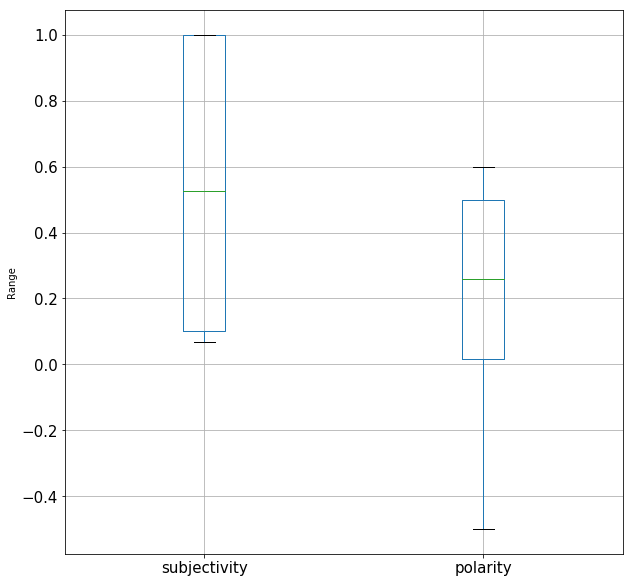

In [8]:
boxplot = dffilter.boxplot(column=['subjectivity','polarity'],fontsize = 15,grid = True, vert=True,figsize=(10,10,))
plt.ylabel('Range')

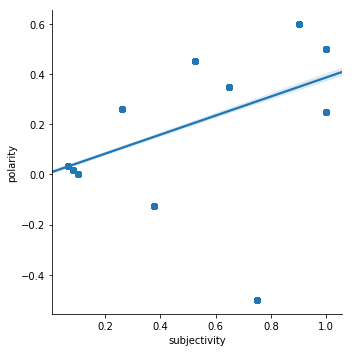

In [9]:
sns.lmplot(x='subjectivity',y='polarity',data=dffilter,fit_reg=True,scatter=True,palette="mute") 

In [10]:
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr

# prepare data
data1 = dffilter['subjectivity']
data2 = data1 + dffilter['polarity']
# calculate covariance matrix
covariance = cov(data1, data2) 
print(covariance)

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

[[0.13495426 0.18612734]
 [0.18612734 0.31809241]]
Pearsons correlation: 0.89834


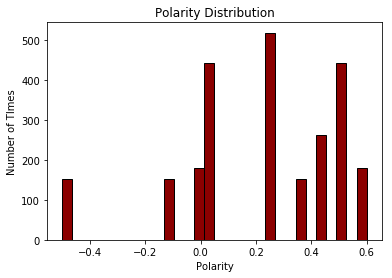

In [11]:
plt.hist(dffilter['polarity'], color = 'darkred', edgecolor = 'black', density=False,
         bins = int(30))
plt.title('Polarity Distribution')
plt.xlabel("Polarity")
plt.ylabel("Number of TImes")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


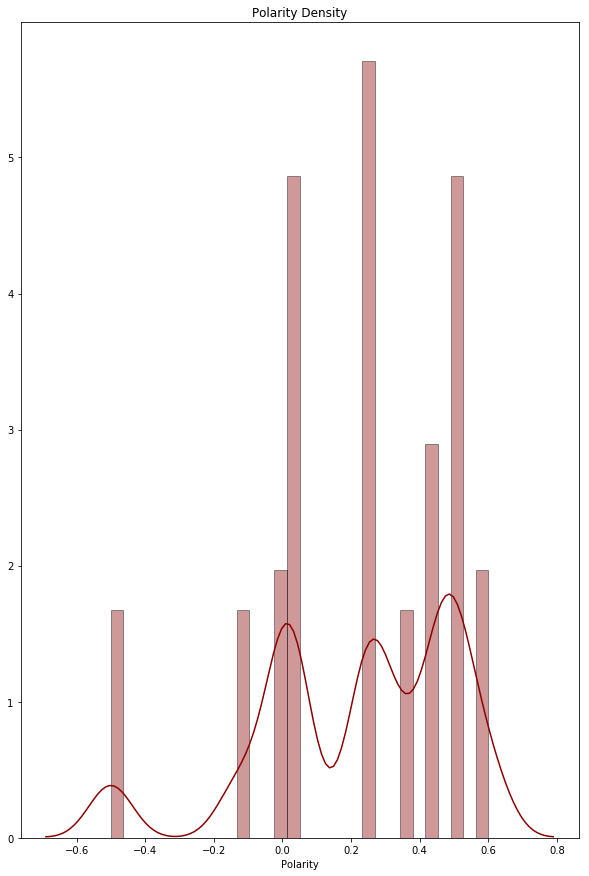

In [12]:
sns.distplot(dffilter['polarity'], hist=True, kde=True, 
             bins=int(30), color = 'darkred',
             hist_kws={'edgecolor':'black'},axlabel ='Polarity')
plt.title('Polarity Density')

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

In [53]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
RE_stopwords = r'\b(?:{})\b;'.format('|'.join(stopwords.words('english')))
df.text.str.lower().replace([RE_stopwords,r'\?',r'\!',r'\)',r'\(',r'\&',r'\,',r'\''], ['','','','','','','',''], regex=True)

words = (df.text
           .str.lower()
           .replace([r'\?',r'\!',r'\)',r'\(',r'\&',r'\,',r'\'', RE_stopwords], [' ', '','','','','','',''], regex=True)
           .str.cat(sep=' ')
           .split()
)


words=[word for word in words if word not in RE_stopwords]

0                               is this product cool
1                                       this is lame
2                                    get that money 
3                                     other comment 
4                               is this product cool
5                                       this is lame
6                                    get that money 
7                                     other comment 
8                               is this product cool
9                                       this is lame
10                                   get that money 
11                                    other comment 
12                              is this product cool
13                                      this is lame
14                                   get that money 
15                                    other comment 
16                              is this product cool
17                                      this is lame
18                                   get that 

Text(0,0.5,'Count')

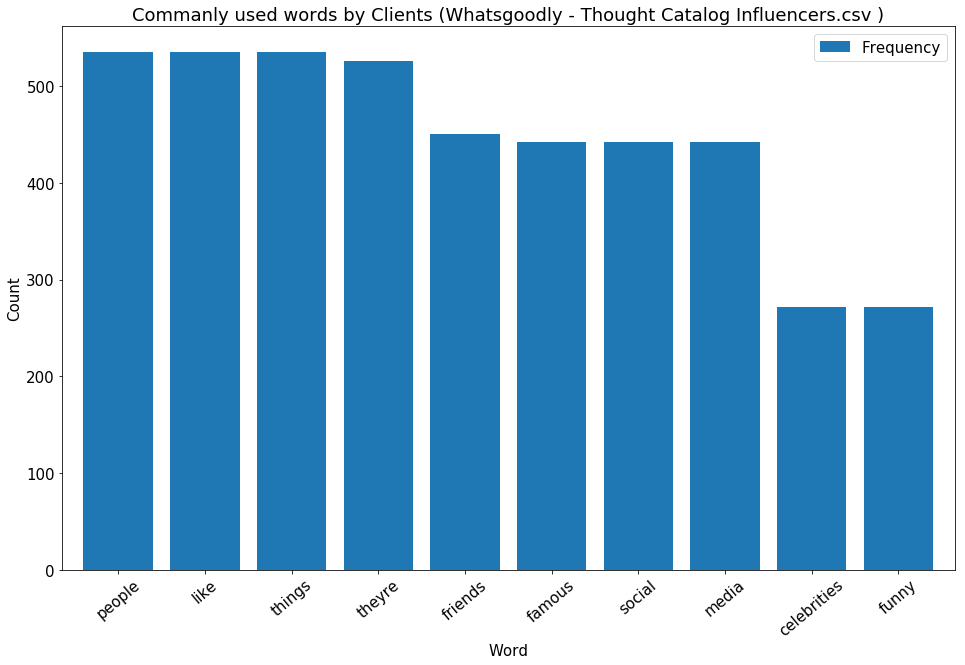

In [61]:
from collections import Counter
rslt = pd.DataFrame(Counter(words).most_common(10),columns=['Word', 'Frequency']).set_index('Word')
#BAR CHART
rslt.plot.bar(rot=40, figsize=(16,10), width=0.8,colormap='tab10')
plt.title("Commanly used words by Clients (Whatsgoodly - Thought Catalog Influencers.csv )")
plt.ylabel("Count")

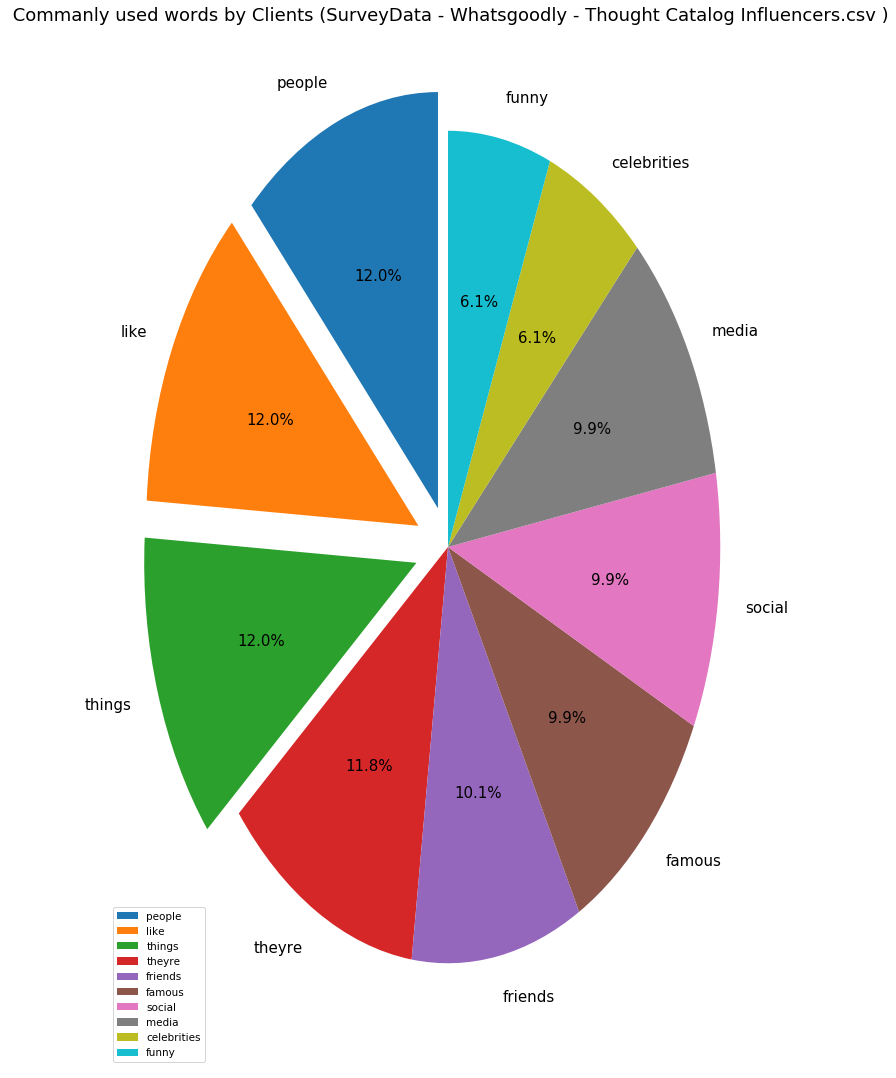

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,15

#PIE CHART

explode = (0.1, 0.12, 0.122, 0,0,0,0,0,0,0)  # explode 1st slice
labels=['people',
        'like',
        'things',
        'theyre',
        'friends',
        'famous',
        'social',
        'media',
        'celebrities',
        'funny']
plt.pie(rslt['Frequency'], explode=explode,labels =labels , autopct='%1.1f%%',shadow=False, startangle=90)
plt.legend( labels, loc='lower left',fontsize='x-small',markerfirst = True)
plt.tight_layout()
plt.title(' Commanly used words by Clients (SurveyData - Whatsgoodly - Thought Catalog Influencers.csv )')
plt.show()

import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0

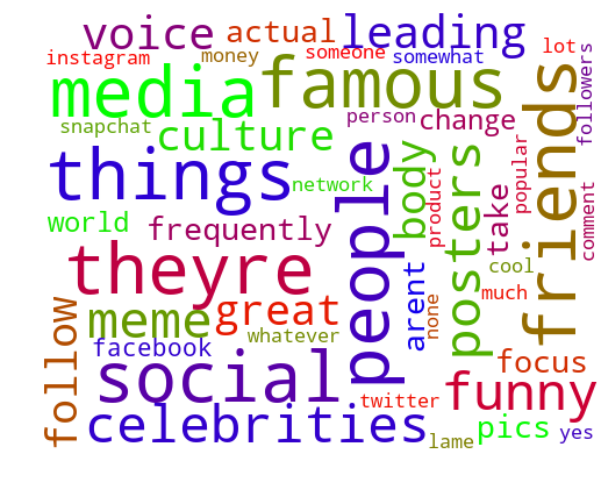

<Figure size 720x720 with 0 Axes>

In [63]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

wordcloud = WordCloud(max_font_size=60, max_words=100, width=480, height=380,colormap="brg",
                      background_color="white").generate(' '.join(rslt_wordcloud['Word']))
                      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[10,10])
plt.show()